# Proyecto análisis de conversación de mensajería

## Cargar datos
- Exportar una conversación personal o grupal de Whastapp o Telegram en un formato adecuado (JSON, CSV, etc), no exportar audios, archivos multimedia, etc
- Importar archivo y convertirlo en dataframe
- Obtener y graficar los siguientes datos. Elegir el gráfico que mejor represente los datos

In [14]:
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

with open('result.json','r') as file:
    data = json.load(file)

df = pd.DataFrame(data["messages"])
df

,id,type,date,actor,actor_id,action,inviter,text,title,members,from,from_id,edited,reply_to_message_id,file,mime_type,photo,width,height
0,1009,service,2021-08-09T05:52:05,Emiliano Muñoz,user990387724,join_group_by_link,Group,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1010,service,2021-08-09T12:03:20,Andrea Navarro (juncotic.com),user23471390,edit_group_title,NaN,,Base de datos II 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1011,service,2021-08-09T12:44:29,Gabriel Arenas 🇦🇷,user192620519,invite_members,NaN,,NaN,[Daniel Beato],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1013,service,2021-08-09T14:17:54,Santiago Riera,user805229404,join_group_by_link,Group,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1016,service,2021-08-09T15:35:12,Lucas Galdame Villegas,user1106773171,join_group_by_link,Group,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,1248,message,2021-10-22T18:30:48,NaN,NaN,NaN,NaN,Capaz que era para el 20/11,NaN,NaN,Lucas Galdame Villegas,user1106773171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,1249,message,2021-10-22T18:31:10,NaN,NaN,NaN,NaN,"corregido, metí mal el dedo 😄",NaN,NaN,Gabriel Arenas 🇦🇷,user192620519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,1250,message,2021-10-22T18:31:28,NaN,NaN,NaN,NaN,Perfecto profe!!,NaN,NaN,Giancarlo Galvarini,user1009916191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,1251,message,2021-10-22T18:31:49,NaN,NaN,NaN,NaN,Genial profe,NaN,NaN,Lautaro G,user858971037,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cantidad de mensajes enviados por cada usuario

In [5]:
groups = ['from']
df.groupby(groups,as_index=False).agg(messages = ('text',"count"))
#df.groupby('from')[['id']].count()


,from,messages
0,Andrea Navarro (juncotic.com),3
1,Augusto,8
2,Bruno,1
3,Daniel Beato,2
4,Danilo Verardo,1
5,Delfina Quinteros,2
6,Douglas,2
7,Emiliano Muñoz,3
8,Enzo Fernandez,1
9,Facu Luna,1


### Promedio de palabras utilizadas por mensaje por cada usuario

In [6]:
#Crear una columna nueve en el dataframe contando la cantidad de palabras por mensaje
df['total_words'] = [len(str(x).split(" ")) for x in df['text']]
groups = ['from','total_words']
agregations = {
    'total_words':["min","max","mean"]
}
df.groupby(groups,as_index=False).agg(agregations)
#Agrupar por usuario y cantidad de palabras
df['total_words'] = [len(str(x).split(" ")) for x in df['text']]
df.groupby(['from'])[['total_words']].mean()

,total_words
from,
Andrea Navarro (juncotic.com),4.666667
Augusto,4.250000
Bruno,4.000000
Daniel Beato,3.000000
Danilo Verardo,8.000000
Delfina Quinteros,7.000000
Douglas,4.500000
Emiliano Muñoz,6.333333
Enzo Fernandez,4.000000


### Porcentaje de mensajes enviados por cada usuario

In [7]:
#df.groupby(['from'],as_index=False).agg(
#    avegare=('id', lambda x: (x.count()/df['type'])*100)
#)
df.groupby('from')['type'].count()/df['type'].count()*100

from
Andrea Navarro (juncotic.com)     2.586207
Augusto                           6.896552
Bruno                             0.862069
Daniel Beato                      1.724138
Danilo Verardo                    0.862069
Delfina Quinteros                 1.724138
Douglas                           1.724138
Emiliano Muñoz                    2.586207
Enzo Fernandez                    0.862069
Facu Luna                         0.862069
Fede Pardo                        3.448276
Gabriel Arenas 🇦🇷                15.517241
Giancarlo Galvarini               5.172414
Juan Pablo Garcia                 0.862069
Julian Navarrete                  1.724138
Lautaro G                         4.310345
Lucas Galdame Villegas            6.034483
Lucas Ollarce                     0.862069
Matias                            0.862069
Nicolás Olivares                  0.862069
Ramiro Alberto Giandinoto         4.310345
Santiago Martinez                 1.724138
Santiago Moyano                   2.586207
Santia

### Frecuencia de envío de mensaje dependiendo la hora del día

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%S')
df['hour_only'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%S').dt.hour
df.groupby('hour_only')['type'].count()

hour_only
5      1
9      1
10     1
12     3
14     1
15     8
16     8
17    30
18    49
19     8
20     5
23     1
Name: type, dtype: int64

### Frecuencia de envío de mensaje dependiendo del día de la semana

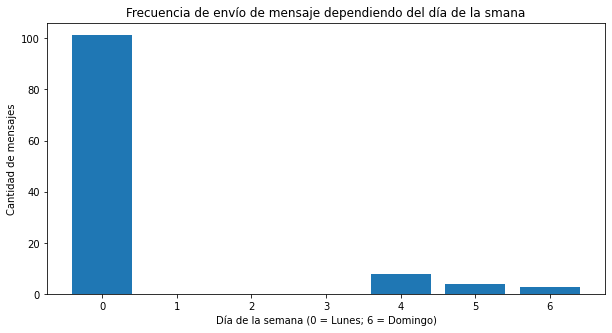

In [18]:
groups = [df['date'].dt.weekday]
df_aux = df.groupby(groups).agg(frequency = ('id','count'))

#Gráfico
plt.figure(figsize=(10,5))
plt.xlabel("Día de la semana (0 = Lunes; 6 = Domingo)")
plt.ylabel("Cantidad de mensajes")
plt.title("Frecuencia de envío de mensaje dependiendo del día de la smana")
plt.bar(df_aux.index,df_aux['frequency'])
plt.show()

### Hora del día preferida por cada usuario para enviar mensajes

In [19]:
groups = ["from"]
#a = df.groupby(groups).agg(frequency = ("date", lambda x: x.dt.hour))
df.groupby(groups).agg(favourite_hour = ("date", lambda x: x.dt.hour.mode()))

,favourite_hour
from,
Andrea Navarro (juncotic.com),17
Augusto,18
Bruno,18
Daniel Beato,"[10, 18]"
Danilo Verardo,17
Delfina Quinteros,"[17, 18]"
Douglas,"[17, 19]"
Emiliano Muñoz,17
Enzo Fernandez,19


### Día de la semana preferida por cada usuario para enviar mensajes

In [20]:
groups = ["from"]
df.groupby(groups).agg(favourite_day = ("date", lambda x: x.dt.weekday.mode()))

,favourite_day
from,
Andrea Navarro (juncotic.com),0
Augusto,5
Bruno,0
Daniel Beato,0
Danilo Verardo,0
Delfina Quinteros,0
Douglas,0
Emiliano Muñoz,0
Enzo Fernandez,0


### Cantidad promedio de mensajes enviados por hora para cada usuario

In [24]:
number_of_days = (df['date'].max() - df['date'].min()).days
print(number_of_days)
groups = ['from']
agregations = {
    'text': lambda x: (x.count()/24)/number_of_days
    
}
df.groupby( groups).agg(agregations)

74


,text
from,
Andrea Navarro (juncotic.com),0.001689
Augusto,0.004505
Bruno,0.000563
Daniel Beato,0.001126
Danilo Verardo,0.000563
Delfina Quinteros,0.001126
Douglas,0.001126
Emiliano Muñoz,0.001689
Enzo Fernandez,0.000563


### Cantidad de usuarios promedio que envían mensaje por cada día de la semana

In [28]:
number_of_weeks = ((df['date'].max() - df['date'].min())).days/7
print(number_of_weeks)
groups = ['from', df['date'].dt.weekday]
print(df['from'].unique())
df_aux = df.groupby( groups).agg(total_messages=('from', lambda x: x.count()/number_of_weeks))

df_aux.groupby(['date']).agg(total_users = ('total_messages', lambda x: x.sum()/len(df_aux.index.unique())))

10.571428571428571
[nan 'Andrea Navarro (juncotic.com)' 'Ramiro Alberto Giandinoto' 'seba F'
 'Fede Pardo' 'Santiago Riera' 'Juan Pablo Garcia' 'Augusto' 'Lautaro G'
 'Lucas Galdame Villegas' 'Julian Navarrete' 'Emiliano Muñoz'
 'Delfina Quinteros' 'Danilo Verardo' 'Santiago Moyano' 'Douglas'
 'Gabriel Arenas 🇦🇷' 'Daniel Beato' 'Yago' 'Giancarlo Galvarini'
 'Santiago Martinez' 'Bruno' 'Matias' 'Lucas Ollarce' 'Nicolás Olivares'
 'jose Ruti' 'Enzo Fernandez' 'Facu Luna']


,total_users
date,
0,0.202703
4,0.021622
5,0.010811
6,0.008108


### Cantidad de mensajes envíados por mes

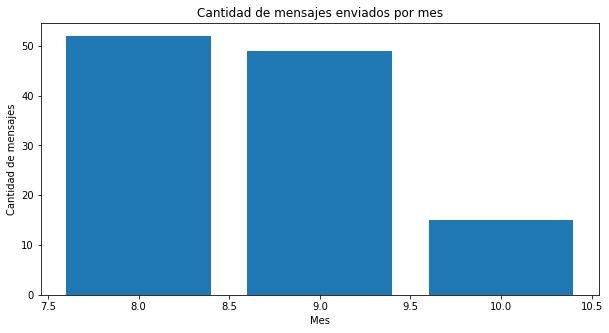

In [31]:
groups = [df['date'].dt.month]
df_aux = df.groupby(groups).agg(total_messages = ('id',lambda x: x.count()))

plt.figure(figsize=(10,5))
plt.xlabel("Mes")
plt.ylabel("Cantidad de mensajes")
plt.title("Cantidad de mensajes enviados por mes")
plt.bar(df_aux.index,df_aux['total_messages'])
plt.show()


### Cantidad mínima, máxima y promedio de palabras por mensaje

In [46]:
df.groupby(['from']).agg({'messages':['min', 'max', 'mean']})

KeyError: "Column(s) ['messages'] do not exist"